- scale continuous variables & logistic regression & feature selection

Read Data

In [3]:
import pandas as pd

projectdat = pd.read_csv("./synthetic_covid_impact_on_work.csv")
display(projectdat)

,Increased_Work_Hours,Work_From_Home,Hours_Worked_Per_Day,Meetings_Per_Day,Productivity_Change,Stress_Level,Health_Issue,Job_Security,Childcare_Responsibilities,Commuting_Changes,Technology_Adaptation,Salary_Changes,Team_Collaboration_Challenges,Sector,Affected_by_Covid
0,1,1,6.392394,2.684594,1,Low,0,0,1,1,1,0,1,Retail,1
1,1,1,9.171984,3.339225,1,Low,0,1,0,1,1,0,1,IT,1
2,1,0,10.612561,2.218333,0,Medium,0,0,0,0,0,0,0,Retail,1
3,1,1,5.546169,5.150566,0,Medium,0,0,0,1,0,0,0,Education,1
4,0,1,11.424615,3.121126,1,Medium,0,1,1,1,0,1,1,Education,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,1,7.961822,2.283857,1,Medium,1,1,1,0,0,0,1,IT,1
9996,0,0,10.917086,3.621406,0,Medium,0,0,1,0,1,0,0,IT,1
9997,1,1,10.176211,1.039689,1,Low,0,1,0,1,1,1,1,Retail,1
9998,1,1,11.903973,3.756725,0,Medium,1,1,0,1,1,1,1,Education,1


Scale continuous variables in order to properly apply feature selection with lasso regression with a binary dataset.

**Note:** Sector may be a determinsitic variable but I don't see a great way to incorporate it into this investigation so it'll be dropped here. In general, regardless of COVID your sector is gonna affect your stress level, so it could be skewed.

In [6]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from numpy import unique

X = projectdat.drop(columns = ['Stress_Level', 'Sector'])
Y = projectdat[['Stress_Level']]
encodedY = LabelEncoder().fit_transform(Y.squeeze())
display(encodedY)

scaledX = StandardScaler().fit_transform(X)
scaledX_df = pd.DataFrame(scaledX, columns = X.columns)
display(scaledX_df)

array([1, 1, 2, ..., 1, 2, 2])

,Increased_Work_Hours,Work_From_Home,Hours_Worked_Per_Day,Meetings_Per_Day,Productivity_Change,Health_Issue,Job_Security,Childcare_Responsibilities,Commuting_Changes,Technology_Adaptation,Salary_Changes,Team_Collaboration_Challenges,Affected_by_Covid
0,0.690886,0.494838,-0.815896,-0.849233,0.99561,-0.656369,-0.824857,1.233206,0.99561,0.807849,-0.491861,0.653719,0.0
1,0.690886,0.494838,0.589094,-0.418985,0.99561,-0.656369,1.212331,-0.810895,0.99561,0.807849,-0.491861,0.653719,0.0
2,0.690886,-2.020862,1.317258,-1.155678,-1.00441,-0.656369,-0.824857,-0.810895,-1.00441,-1.237856,-0.491861,-1.529710,0.0
3,0.690886,0.494838,-1.243635,0.771499,-1.00441,-0.656369,-0.824857,-0.810895,0.99561,-1.237856,-0.491861,-1.529710,0.0
4,-1.447417,0.494838,1.727725,-0.562328,0.99561,-0.656369,1.212331,1.233206,0.99561,-1.237856,2.033094,0.653719,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.690886,0.494838,-0.022602,-1.112613,0.99561,1.523534,1.212331,1.233206,-1.00441,-1.237856,-0.491861,0.653719,0.0
9996,-1.447417,-2.020862,1.471185,-0.233524,-1.00441,-0.656369,-0.824857,1.233206,-1.00441,0.807849,-0.491861,-1.529710,0.0
9997,0.690886,0.494838,1.096698,-1.930328,0.99561,-0.656369,1.212331,-0.810895,0.99561,0.807849,2.033094,0.653719,0.0
9998,0.690886,0.494838,1.970024,-0.144587,-1.00441,1.523534,1.212331,-0.810895,0.99561,0.807849,2.033094,0.653719,0.0


Time for Logistic Regression.

In [9]:
logreg = LogisticRegression(penalty= 'l1', solver = 'saga',random_state=16, max_iter = 1000)
logreg.fit(scaledX, encodedY)

coefficients = logreg.coef_

feature_names = X.columns
selected_features = [i for i, coef in enumerate(coefficients[0]) if coef != 0]
selected_feature_names = feature_names[selected_features]
print("Selected feature names:", selected_feature_names)

Selected feature names: Index(['Increased_Work_Hours', 'Hours_Worked_Per_Day', 'Meetings_Per_Day',
       'Productivity_Change', 'Job_Security', 'Childcare_Responsibilities',
       'Salary_Changes'],
      dtype='object')


Create new dataframe with only selected features.

In [12]:
selectedX = scaledX_df[selected_feature_names]
display(selectedX)

,Increased_Work_Hours,Hours_Worked_Per_Day,Meetings_Per_Day,Productivity_Change,Job_Security,Childcare_Responsibilities,Salary_Changes
0,0.690886,-0.815896,-0.849233,0.99561,-0.824857,1.233206,-0.491861
1,0.690886,0.589094,-0.418985,0.99561,1.212331,-0.810895,-0.491861
2,0.690886,1.317258,-1.155678,-1.00441,-0.824857,-0.810895,-0.491861
3,0.690886,-1.243635,0.771499,-1.00441,-0.824857,-0.810895,-0.491861
4,-1.447417,1.727725,-0.562328,0.99561,1.212331,1.233206,2.033094
...,...,...,...,...,...,...,...
9995,0.690886,-0.022602,-1.112613,0.99561,1.212331,1.233206,-0.491861
9996,-1.447417,1.471185,-0.233524,-1.00441,-0.824857,1.233206,-0.491861
9997,0.690886,1.096698,-1.930328,0.99561,1.212331,-0.810895,2.033094
9998,0.690886,1.970024,-0.144587,-1.00441,1.212331,-0.810895,2.033094


- split data & training/testing data & find best k

Split data into training and test sets.

**Note:** Y.squeeze() used to convert original Y DataFrame to 1D series, as expected for GridSearchCV.

In [16]:
import sklearn.model_selection as ms

XTrain, XTest, YTrain, YTest = ms.train_test_split(selectedX, encodedY, test_size= 0.3, random_state=7)

Hyperparameter tuning for KNN with grid search and cross-validation

**Note:** Increased range of k to test due to large dataset.

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors

k_neighbours = list(range(1,85,2))   
n_grid = [{'n_neighbors': k_neighbours}]

model = neighbors.KNeighborsClassifier(weights='distance',metric='manhattan')
cv_knn = GridSearchCV(estimator=model, param_grid=n_grid, cv=ms.KFold(n_splits=10))
cv_knn.fit(XTrain, YTrain)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(metric='manhattan',
                                            weights='distance'),
             param_grid=[{'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                          23, 25, 27, 29, 31, 33, 35, 37, 39,
                                          41, 43, 45, 47, 49, 51, 53, 55, 57,
                                          59, ...]}])

Best k for the training set.

In [22]:
best_k = cv_knn.best_params_['n_neighbors']
print("Best k:", best_k)

Best k: 83


- KNN 

In [25]:
# fit KNN with best k
nbrs_model = neighbors.KNeighborsClassifier(n_neighbors=best_k, weights='distance')
nbrs_model.fit(XTrain, YTrain)

# predicting x test
y_pred = nbrs_model.predict(XTest)

- confusion matrix visual (shown below) & KNN visual graph (shown below)

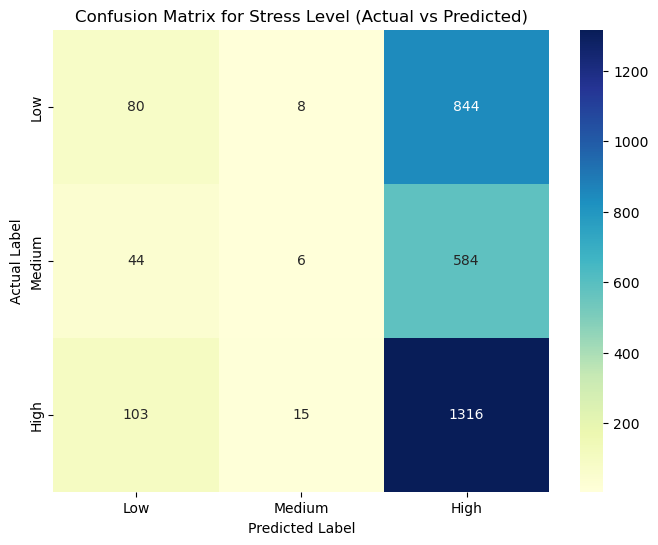

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(YTest, y_pred)

class_names = ["Low", "Medium", "High"] 
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix for Stress Level (Actual vs Predicted)')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [30]:
print(unique(YTest, return_counts= True))
unique(y_pred, return_counts=True)


(array([0, 1, 2]), array([ 932,  634, 1434], dtype=int64))


(array([0, 1, 2]), array([ 227,   29, 2744], dtype=int64))

In [32]:

from sklearn.metrics import classification_report
print(classification_report(YTest, y_pred, target_names=["Low", "Medium", "High"]))



              precision    recall  f1-score   support

         Low       0.35      0.09      0.14       932
      Medium       0.21      0.01      0.02       634
        High       0.48      0.92      0.63      1434

    accuracy                           0.47      3000
   macro avg       0.35      0.34      0.26      3000
weighted avg       0.38      0.47      0.35      3000



We are not getting great results here, perhaps further reducing dimensionality to, say, 4 or 5 features will help our model.

In [35]:
from sklearn.decomposition import PCA

pca =PCA(n_components=3)

XTrain_Reduced = pca.fit_transform(XTrain)
XTest_Reduced = pca.transform(XTest)



In [37]:
k_neighbours = list(range(1,85,2))   
n_grid = [{'n_neighbors': k_neighbours}]

model = neighbors.KNeighborsClassifier()
cv_knn = GridSearchCV(estimator=model, param_grid=n_grid, cv=ms.KFold(n_splits=10))
cv_knn.fit(XTrain_Reduced, YTrain)
print(best_k)

83


In [38]:
# fit KNN with best k
nbrs_model = neighbors.KNeighborsClassifier(n_neighbors=best_k)
nbrs_model.fit(XTrain_Reduced, YTrain)

# predicting x test
y_pred2 = nbrs_model.predict(XTest_Reduced)

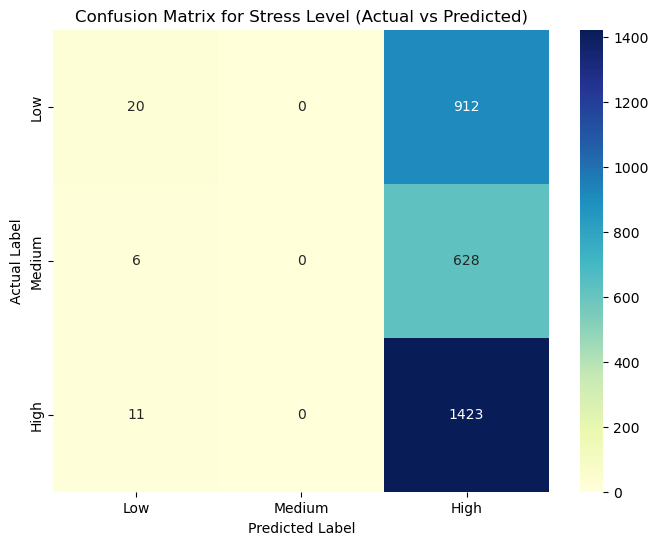

              precision    recall  f1-score   support

         Low       0.54      0.02      0.04       932
      Medium       0.00      0.00      0.00       634
        High       0.48      0.99      0.65      1434

    accuracy                           0.48      3000
   macro avg       0.34      0.34      0.23      3000
weighted avg       0.40      0.48      0.32      3000



C:\Users\mo911172\AppData\Local\anaconda3.2\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mo911172\AppData\Local\anaconda3.2\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mo911172\AppData\Local\anaconda3.2\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [39]:
cm2 = confusion_matrix(YTest, y_pred2)

class_names = ["Low", "Medium", "High"] 
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt='d', cmap='YlGnBu', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix for Stress Level (Actual vs Predicted)')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

print(classification_report(YTest, y_pred2, target_names=["Low", "Medium", "High"]))

Can't seem to get passed a 47/48% accuracy, and although this is technically better than random (33%) all the KNN models we've found have focused on predicting the High values. We may try a decision tree, random forests, or logistic model.

In [96]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(XTrain, YTrain)
y_pred_forest = model.predict(XTest)

# Classification report 
print(classification_report(YTest, y_pred_forest, target_names=["Low", "Medium", "High"]))

              precision    recall  f1-score   support

         Low       0.32      0.27      0.30       932
      Medium       0.22      0.12      0.15       634
        High       0.47      0.62      0.54      1434

    accuracy                           0.40      3000
   macro avg       0.34      0.34      0.33      3000
weighted avg       0.37      0.40      0.38      3000



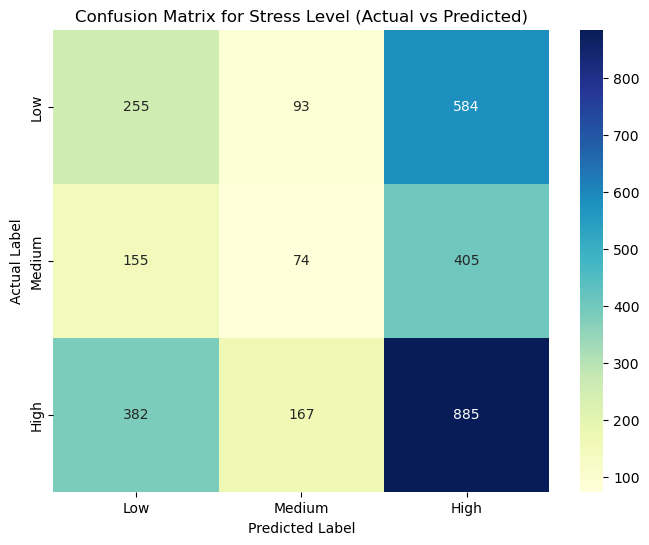

In [98]:
cm = confusion_matrix(YTest, y_pred_forest)

class_names = ["Low", "Medium", "High"] 
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix for Stress Level (Actual vs Predicted)')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [100]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(XTrain_Reduced, YTrain)
y_pred_forest = model.predict(XTest_Reduced)

# Classification report 
print(classification_report(YTest, y_pred_forest, target_names=["Low", "Medium", "High"]))

              precision    recall  f1-score   support

         Low       0.33      0.26      0.29       932
      Medium       0.22      0.10      0.13       634
        High       0.48      0.67      0.56      1434

    accuracy                           0.42      3000
   macro avg       0.34      0.34      0.33      3000
weighted avg       0.38      0.42      0.38      3000



In [104]:
# for loop to see which depth level fits the best

from sklearn.tree import DecisionTreeClassifier
for i in range(1,100):
    model_tree = DecisionTreeClassifier(max_depth=i)
    model_tree.fit(XTrain, YTrain)
    print('depth = ', i)
    y_pred_tree = model_tree.predict(XTest)
    print(classification_report(YTest, y_pred_tree, target_names=["Low", "Medium", "High"]))

depth =  1
              precision    recall  f1-score   support

         Low       0.00      0.00      0.00       932
      Medium       0.00      0.00      0.00       634
        High       0.48      1.00      0.65      1434

    accuracy                           0.48      3000
   macro avg       0.16      0.33      0.22      3000
weighted avg       0.23      0.48      0.31      3000

depth =  2
              precision    recall  f1-score   support

         Low       0.00      0.00      0.00       932
      Medium       0.00      0.00      0.00       634
        High       0.48      1.00      0.65      1434

    accuracy                           0.48      3000
   macro avg       0.16      0.33      0.22      3000
weighted avg       0.23      0.48      0.31      3000

depth =  3
              precision    recall  f1-score   support

         Low       0.00      0.00      0.00       932
      Medium       0.00      0.00      0.00       634
        High       0.48      1.00      0.6

C:\Users\mo911172\AppData\Local\anaconda3.2\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mo911172\AppData\Local\anaconda3.2\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mo911172\AppData\Local\anaconda3.2\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

depth =  11
              precision    recall  f1-score   support

         Low       0.31      0.06      0.10       932
      Medium       0.30      0.02      0.04       634
        High       0.48      0.93      0.63      1434

    accuracy                           0.46      3000
   macro avg       0.36      0.33      0.26      3000
weighted avg       0.39      0.46      0.34      3000

depth =  12
              precision    recall  f1-score   support

         Low       0.29      0.05      0.08       932
      Medium       0.23      0.02      0.04       634
        High       0.48      0.93      0.63      1434

    accuracy                           0.46      3000
   macro avg       0.33      0.33      0.25      3000
weighted avg       0.37      0.46      0.34      3000

depth =  13
              precision    recall  f1-score   support

         Low       0.31      0.05      0.09       932
      Medium       0.22      0.02      0.04       634
        High       0.48      0.93      

In [106]:
model_tree = DecisionTreeClassifier(max_depth=11)
model_tree.fit(XTrain, YTrain)

y_pred_tree = model_tree.predict(XTest)


print(classification_report(YTest, y_pred_tree, target_names=["Low", "Medium", "High"]))

              precision    recall  f1-score   support

         Low       0.30      0.05      0.09       932
      Medium       0.26      0.02      0.04       634
        High       0.48      0.92      0.63      1434

    accuracy                           0.46      3000
   macro avg       0.34      0.33      0.25      3000
weighted avg       0.38      0.46      0.34      3000



In [108]:
# for loop to see which depth level fits the best

for i in range(1,100):
    model_tree = DecisionTreeClassifier(max_depth=i)
    model_tree.fit(XTrain_Reduced, YTrain)
    
    print('depth = ', i)
    y_pred_tree_reduced = model_tree.predict(XTest_Reduced)
    
    print(classification_report(YTest, y_pred_tree_reduced, target_names=["Low", "Medium", "High"]))

depth =  1
              precision    recall  f1-score   support

         Low       0.00      0.00      0.00       932
      Medium       0.00      0.00      0.00       634
        High       0.48      1.00      0.65      1434

    accuracy                           0.48      3000
   macro avg       0.16      0.33      0.22      3000
weighted avg       0.23      0.48      0.31      3000

depth =  2
              precision    recall  f1-score   support

         Low       1.00      0.00      0.00       932
      Medium       0.00      0.00      0.00       634
        High       0.48      1.00      0.65      1434

    accuracy                           0.48      3000
   macro avg       0.49      0.33      0.22      3000
weighted avg       0.54      0.48      0.31      3000

depth =  3
              precision    recall  f1-score   support

         Low       0.50      0.00      0.00       932
      Medium       0.00      0.00      0.00       634
        High       0.48      1.00      0.6

C:\Users\mo911172\AppData\Local\anaconda3.2\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mo911172\AppData\Local\anaconda3.2\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mo911172\AppData\Local\anaconda3.2\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

depth =  10
              precision    recall  f1-score   support

         Low       0.31      0.04      0.07       932
      Medium       0.21      0.02      0.03       634
        High       0.48      0.94      0.63      1434

    accuracy                           0.46      3000
   macro avg       0.33      0.33      0.25      3000
weighted avg       0.37      0.46      0.33      3000

depth =  11
              precision    recall  f1-score   support

         Low       0.34      0.07      0.12       932
      Medium       0.10      0.01      0.01       634
        High       0.48      0.91      0.63      1434

    accuracy                           0.46      3000
   macro avg       0.31      0.33      0.25      3000
weighted avg       0.35      0.46      0.34      3000

depth =  12
              precision    recall  f1-score   support

         Low       0.35      0.07      0.12       932
      Medium       0.21      0.02      0.04       634
        High       0.48      0.91      

In [110]:
model_tree = DecisionTreeClassifier(max_depth=14)
model_tree.fit(XTrain_Reduced, YTrain)

y_pred_tree_reduced = model_tree.predict(XTest_Reduced)


print(classification_report(YTest, y_pred_tree_reduced, target_names=["Low", "Medium", "High"]))

              precision    recall  f1-score   support

         Low       0.36      0.10      0.15       932
      Medium       0.28      0.05      0.09       634
        High       0.48      0.88      0.62      1434

    accuracy                           0.46      3000
   macro avg       0.37      0.34      0.29      3000
weighted avg       0.40      0.46      0.36      3000



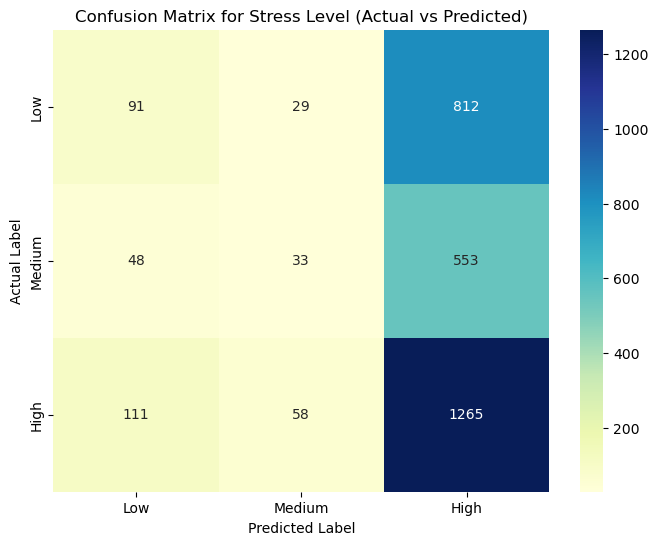

In [112]:
cm = confusion_matrix(YTest, y_pred_tree_reduced)

class_names = ["Low", "Medium", "High"] 
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix for Stress Level (Actual vs Predicted)')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

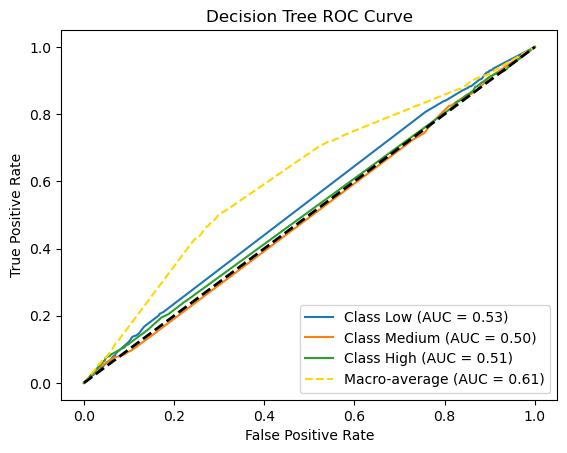

In [164]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer

class_names = ['Low', 'Medium', 'High']

label_binarizer = LabelBinarizer()
YTest_binarized = label_binarizer.fit_transform(YTest)

y_prob_tree = model_tree.predict_proba(XTest_Reduced)

fpr_tree = {}
tpr_tree = {}
roc_auc_tree = {}

for i in range(len(class_names)): 
    fpr_tree[i], tpr_tree[i], _ = roc_curve(YTest_binarized[:, i], y_prob_tree[:, i])
    roc_auc_tree[i] = auc(fpr_tree[i], tpr_tree[i])

fpr_tree["macro"], tpr_tree["macro"], _ = roc_curve(YTest_binarized.ravel(), y_prob_tree.ravel())
roc_auc_tree["macro"] = auc(fpr_tree["macro"], tpr_tree["macro"])

plt.figure()
for i in range(len(class_names)): 
    plt.plot(
        fpr_tree[i], tpr_tree[i], 
        label=f'Class {class_names[i]} (AUC = {roc_auc_tree[i]:.2f})'
    )
plt.plot(
    fpr_tree["macro"], tpr_tree["macro"], 
    label=f'Macro-average (AUC = {roc_auc_tree["macro"]:.2f})', 
    color='gold', linestyle='--'
)
plt.plot([0, 1], [0, 1], 'k--', lw=2) 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.legend(loc="lower right")
plt.show()


Macro-Average AUC = 0.61

This indicates that, on average, our model is doing a bit better than random guessing (AUC = 0.5).

In [134]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

important_feature_indices = [i for i, importance in enumerate(best_decision_tree.feature_importances_) if importance > 0]
important_feature_names = [X.columns[i] for i in important_feature_indices]

dot_data = export_graphviz(
    best_decision_tree,
    feature_names=important_feature_names,  
    class_names=["Low", "Medium", "High"],
    filled=True,
    rounded=True,
    special_characters=True
)

dot_file_path = "./decision_tree_visualization.dot"
with open(dot_file_path, "w") as file:
    file.write(dot_data)

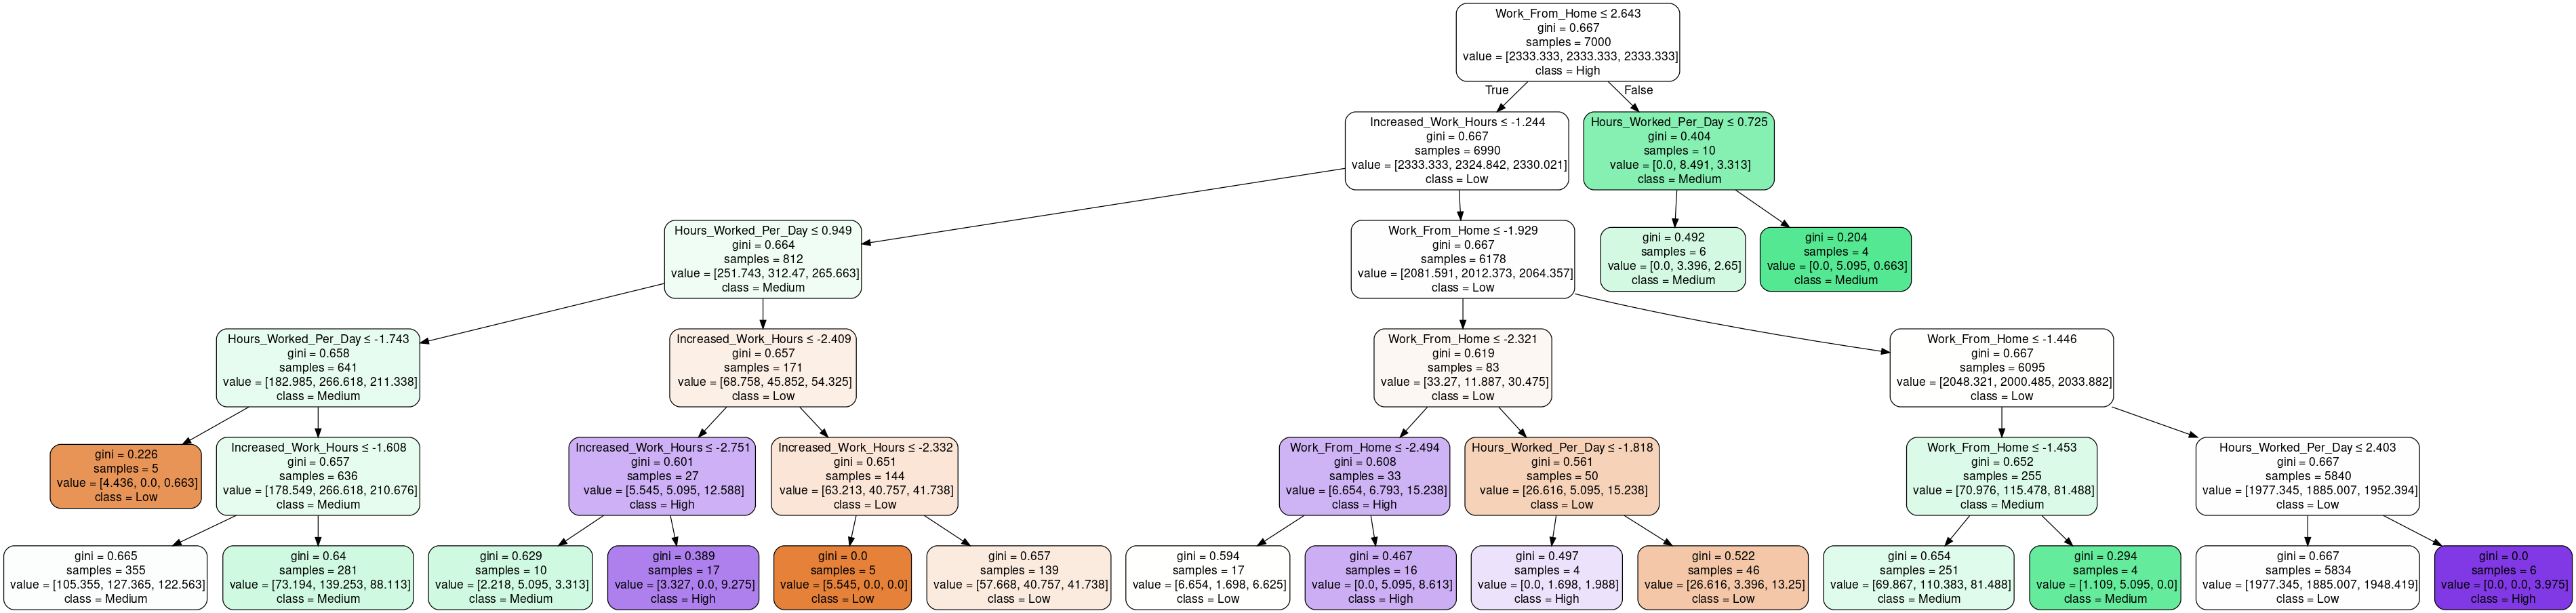

In [144]:
from IPython.display import Image

Image(filename="./tree.png")